In [12]:
import pandas as pd
import numpy as np
import scanpy as sc

In [13]:
granger_df_all_T = pd.read_csv('../results_final_Jan15/granger_draft_A_signed_score.csv', index_col=0) # this is called T but is actually A.
granger_df_all_T_pvals = pd.read_csv('../results_final_Jan15/granger_draft_A_p.csv', index_col=0)
granger_df_all_T_pvals.index = granger_df_all_T_pvals.index.str.replace('_x', '')
cluster_df = pd.read_csv('../results_Jun2_suppl/cluster_df_extreme_A_draft.csv', index_col=0)
df_reordered = pd.read_csv('../results_Jun2_suppl/granger_draft_heatmap_df_reordered.csv', index_col=0)
adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')

In [14]:
granger_df_all_T

,SAMD11,NOC2L,HES4,ISG15,AGRN,TNFRSF18,ACAP3,MXRA8,CCNL2,VWA1,...,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
HES4,0.253563,0.247868,-0.000976,-0.176410,3.199690,0.009984,-1.835698,-0.001231,0.728045,1.333422,...,0.233834,1.923076,0.618062,0.186499,1.655421,2.324922,0.603590,0.782306,-0.712893,0.462606
CENPS,-5.316662,-0.521152,1.331540,0.204126,-0.802104,-3.671848,0.059020,0.156899,2.435609,-1.506764,...,-0.467639,-5.233163,-0.607319,-0.012581,-2.351328,-5.749480,-0.744589,-0.100027,-2.862728,-0.466001
SPEN,-0.529088,1.534352,0.415279,-6.931449,2.142925,1.927848,1.869159,-0.235740,6.138878,-0.151245,...,2.468464,-3.862852,1.598527,3.147510,-0.927416,-1.010580,2.032703,4.334336,-2.595465,1.897791
RUNX3,-0.102877,-1.349992,0.087688,1.687658,0.031739,-2.482560,-3.744273,-0.413410,-1.051267,1.818499,...,-1.100366,1.580268,-0.593457,-1.189173,0.847423,0.832489,-0.530518,-0.994871,-0.594617,-0.852243
AHDC1,6.931472,2.749430,2.078824,0.838478,-0.418023,0.615563,-0.824274,2.271416,-1.416936,2.232270,...,-2.761291,6.537179,-1.655518,-3.265782,0.812937,1.144279,-1.297411,-4.173440,3.025194,-2.244087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GABPA,-4.278331,-3.845271,-0.295811,-6.931472,3.362137,1.630143,1.000968,-1.414375,4.949683,-0.942746,...,2.949489,-5.352467,1.936371,3.451603,-0.684193,-0.694297,2.491680,5.715771,-4.637921,2.226473
BACH1,-1.768226,-6.931472,-0.266294,-2.703542,2.428197,2.272968,0.724390,-2.548962,0.578124,1.907572,...,6.133331,-3.726659,3.643399,4.631184,0.297129,0.170469,6.744386,4.901901,-1.448452,3.329780
SON,-0.363012,1.149774,0.208682,-6.931299,2.329413,2.372508,1.654800,-0.408290,5.174138,-0.099147,...,2.572648,-2.704775,1.663717,3.059942,-0.872133,-0.744086,2.175484,4.540002,-2.452521,1.937269
RUNX1,-2.524710,-3.142248,-0.305727,-3.778618,0.801061,2.818921,4.009661,-0.956446,1.522574,-2.596840,...,5.072245,-6.926420,2.308247,4.839094,-0.663482,-0.941079,3.303893,4.246802,-0.869650,2.740697


filter by cluster

In [15]:
tf_reordered_cluster = pd.DataFrame(index=df_reordered.index)
tf_reordered_cluster['cluster'] = tf_reordered_cluster.index.map(cluster_df['cluster'])
gene_reordered_cluster = pd.DataFrame(index=df_reordered.columns)
gene_reordered_cluster['cluster'] = gene_reordered_cluster.index.map(cluster_df['cluster'])
df_reordered_filtered = df_reordered.copy()

# Create boolean mask for TF clusters > gene clusters using broadcasting
tf_clusters = tf_reordered_cluster['cluster'].values[:, np.newaxis]
gene_clusters = gene_reordered_cluster['cluster'].values
mask = tf_clusters > gene_clusters

# Apply mask to set values to 0 
df_reordered_filtered.values[mask] = 0


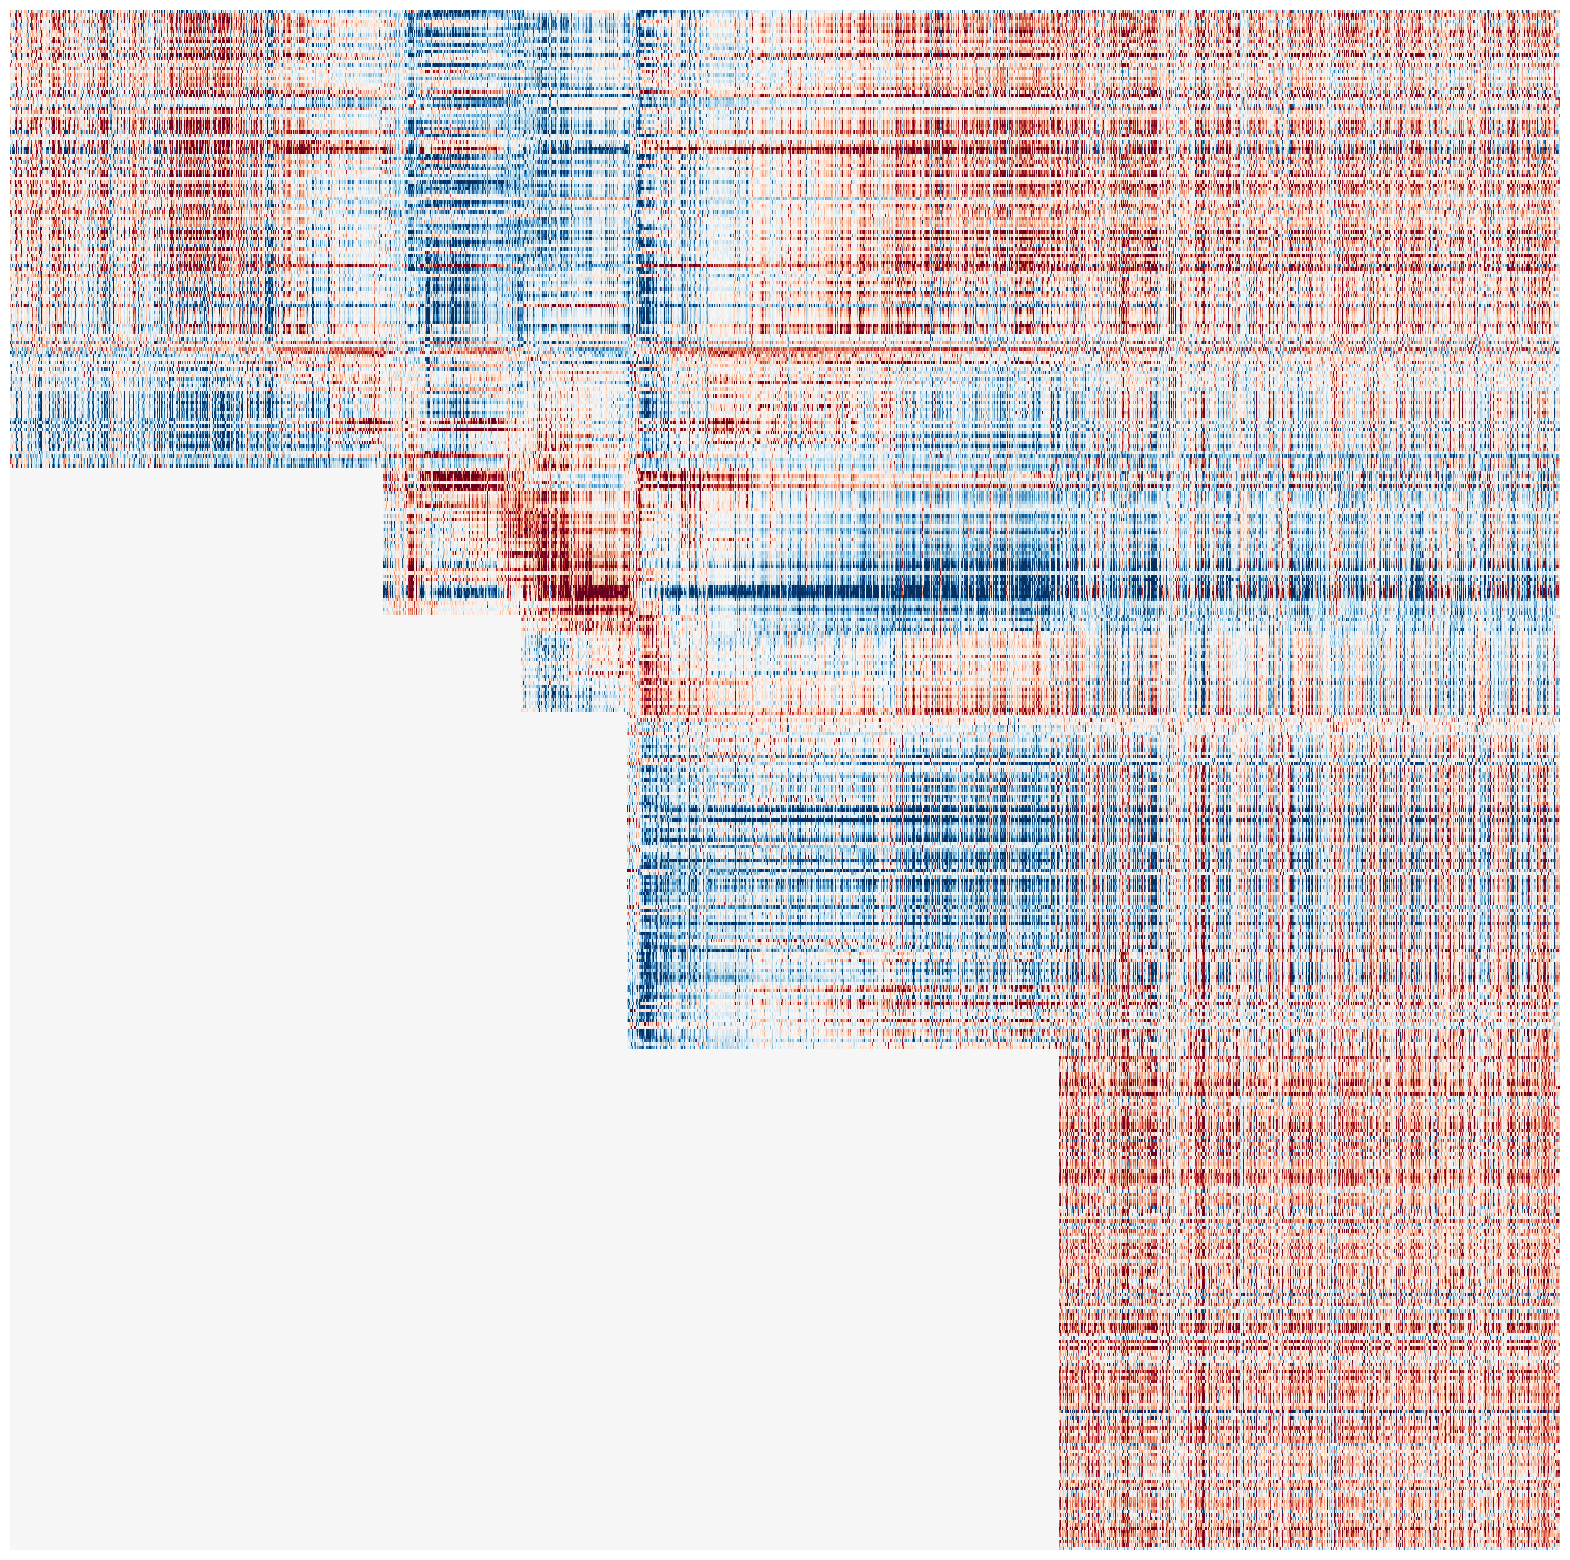

In [16]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(df_reordered_filtered, cmap='RdBu_r', center=0)
plt.xticks([])
plt.yticks([])
plt.gca().collections[0].colorbar.remove()
plt.savefig('../results_Jun2_suppl/granger_draft_heatmap_filtered_cluster_gene_after_tf.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
assert False

AssertionError: 

# Below are deserted!

filter by peak order

In [6]:
import scanpy as sc


from sklearn.preprocessing import StandardScaler
import seaborn as sns

adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')
gene_names = adata.var_names.to_numpy()

traj = np.load(f"../results_final_Dec22/traj_gene_space_A_extreme.npy", allow_pickle=True)

# sc.pp.highly_variable_genes(adata, n_top_genes=400)
# alex_genes = open('../data/alex_genes.txt').read().splitlines()
# alex_tfs = open('../data/alex_tfs.txt').read().splitlines()

alex_genes = granger_df_all_T.columns.to_list()
alex_tfs = granger_df_all_T.index.to_list()

alex_gene_all = list(set(alex_genes) | set(alex_tfs))
alex_gene_all_mask = np.isin(adata.var_names, alex_gene_all)
traj = traj[:, :, alex_gene_all_mask]
gene_names = adata.var_names[alex_gene_all_mask]

traj_mean = traj.mean(axis=1)
traj_std = traj.std(axis=1)
traj_mean_std = traj_mean.std(axis=0)
zero_std_genes = traj_mean_std == 0
gene_names = np.array(gene_names)[~zero_std_genes]
traj, traj_mean, traj_std, traj_mean_std = traj[..., ~zero_std_genes], traj_mean[..., ~zero_std_genes], traj_std[..., ~zero_std_genes], traj_mean_std[..., ~zero_std_genes]
# traj_mean_normalized = (traj_mean - traj_mean.mean(axis=0)) / traj_mean.std(axis=0)
traj_mean_normalized = (traj_mean - traj_mean.min(axis=0)) / (traj_mean.max(axis=0) - traj_mean.min(axis=0))
trends_df = pd.DataFrame(traj_mean_normalized, columns=gene_names, index=[f't{i}' for i in range(traj_mean_normalized.shape[0])]).T

# Get the indices of top 5 values for each row
top_5_indices = trends_df.apply(lambda x: np.where(x >= sorted(x)[-10])[0].mean(), axis=1)
# Sort the dataframe by mean of top 5 indices
trends_df_sorted = trends_df.iloc[top_5_indices.argsort()]

signed_score_df = granger_df_all_T

# Extract valid names for columns and rows
valid_cols = [name for name in trends_df_sorted.index if name in signed_score_df.columns]
valid_rows = [name for name in trends_df_sorted.index if name in signed_score_df.index]

In [7]:
gene_rank_df = pd.DataFrame(index=trends_df_sorted.index)
gene_rank_df['rank'] = np.arange(len(gene_rank_df))

In [8]:
gene_ranks = gene_rank_df.loc[df_reordered.columns]
tf_ranks = gene_rank_df.loc[df_reordered.index]
df_reordered_filtered_rank = df_reordered.copy()

# Create boolean mask for TF clusters > gene clusters using broadcasting
tf_clusters = tf_ranks['rank'].values[:, np.newaxis]
gene_clusters = gene_ranks['rank'].values
mask = tf_clusters > gene_clusters

# Apply mask to set values to 0 
df_reordered_filtered_rank.values[mask] = 0

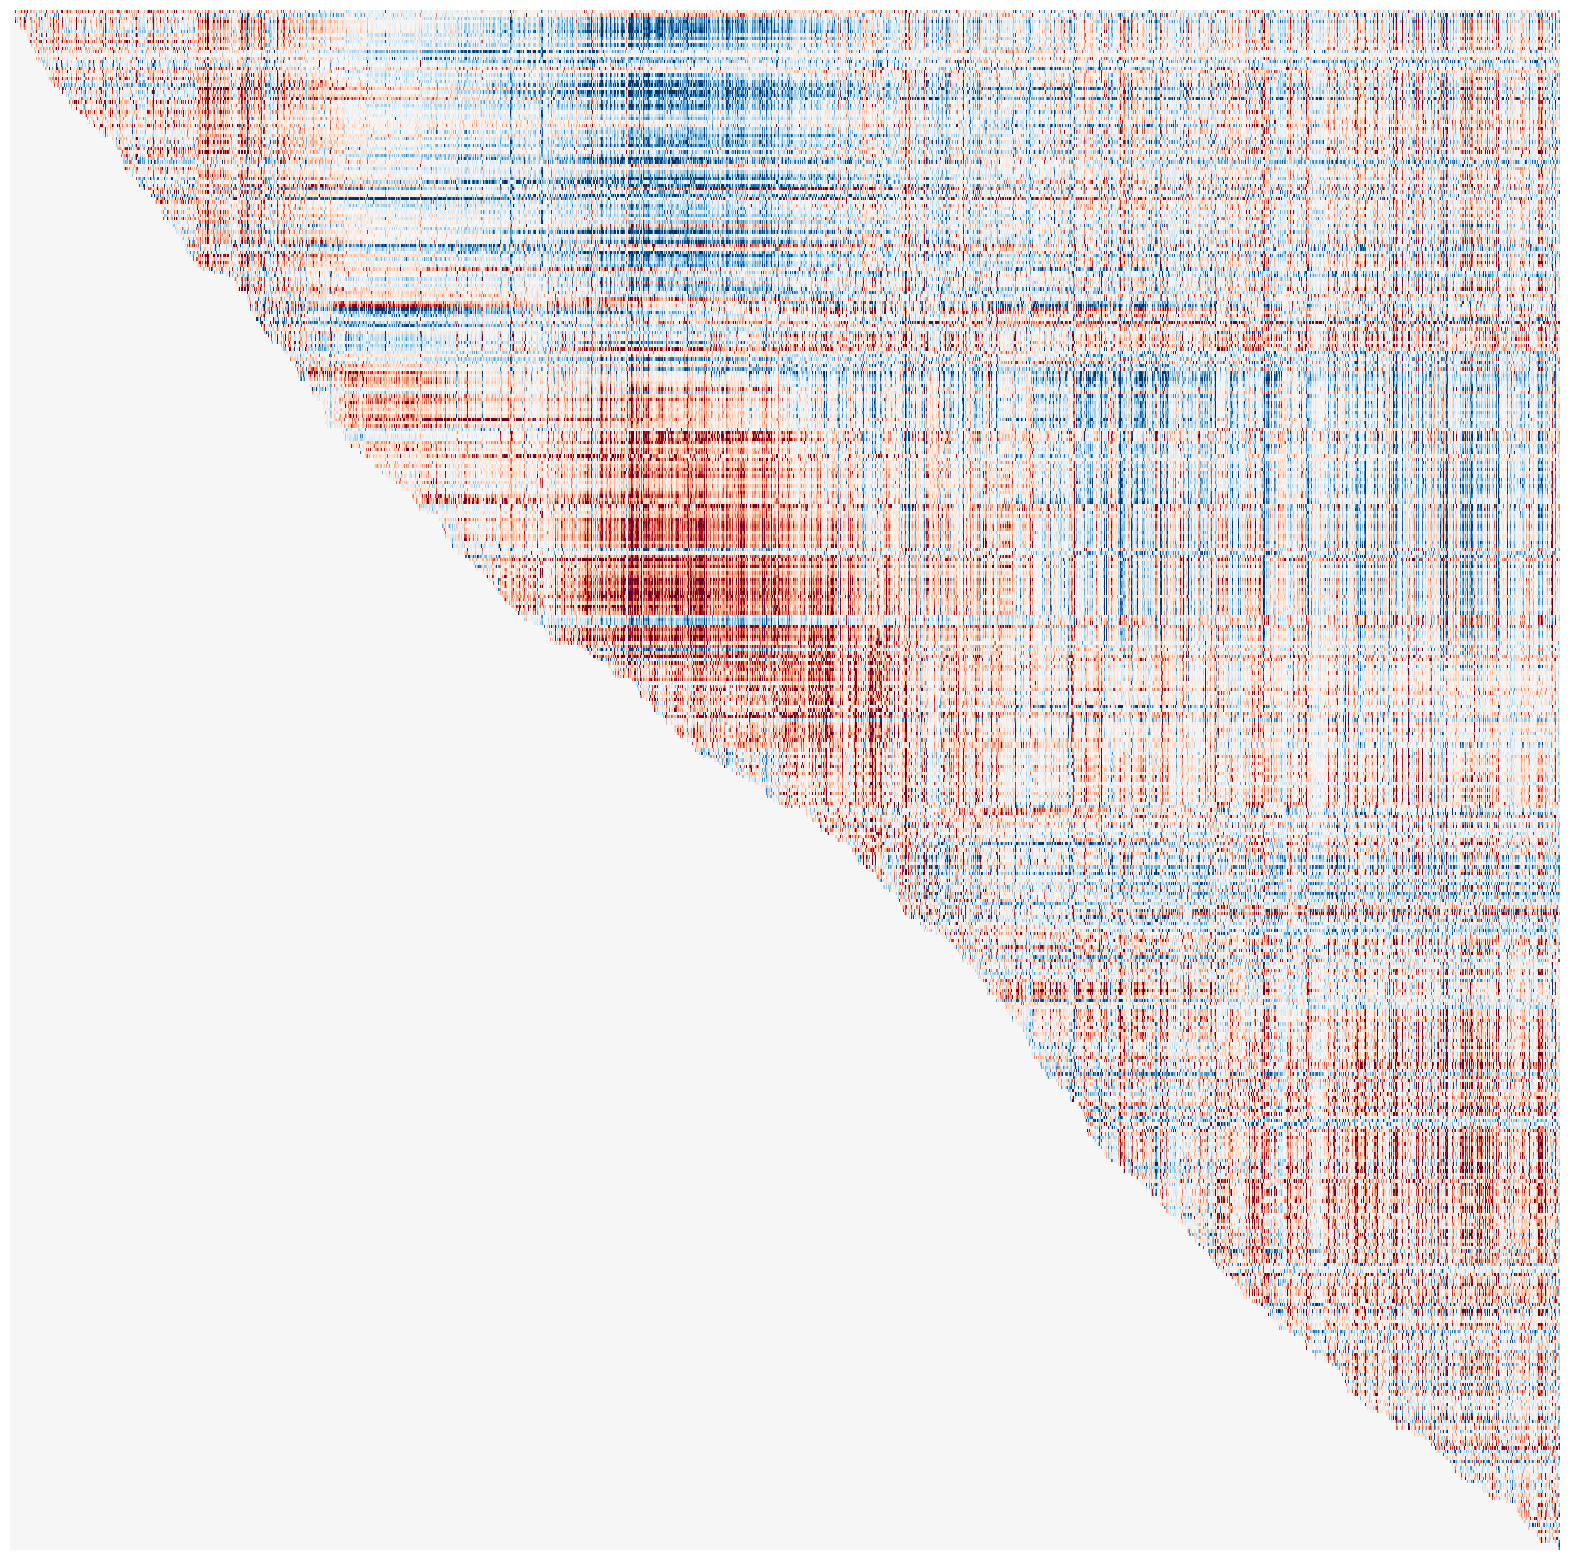

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(df_reordered_filtered_rank, cmap='RdBu_r', center=0)
plt.xticks([])
plt.yticks([])
plt.gca().collections[0].colorbar.remove()
plt.savefig('../results_Jun2_suppl/granger_draft_heatmap_filtered_peak_gene_after_tf.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
unique_T_regulated_df = pd.read_csv('../results_final_Jan30/unique_T_regulated_df_top10_top100.csv', index_col=0)

In [11]:
(unique_T_regulated_df['source_cluster'] <= unique_T_regulated_df['target_cluster']).sum()

520

In [12]:
pairs_filtered = unique_T_regulated_df[unique_T_regulated_df['source_cluster'] <= unique_T_regulated_df['target_cluster']]

In [13]:
len(pairs_filtered.index.unique())

79

In [14]:
pd.set_option('display.max_rows', None)
print(pairs_filtered.groupby('source').size().sort_values(ascending=True))
pd.reset_option('display.max_rows')

source
ZNF277        1
RFX3          1
GLIS3         2
ALX1          2
SON           2
NFYA          2
MBD6          2
SNAI2         2
ZNF507        2
ZNF667        3
CEBPB         3
ESRRA         3
ZNF804A       3
MAF           3
IRF2          4
ARNT          4
ZNF280B       4
GTF2IRD2B     4
HBP1          4
SMAD1         4
NR1D2         4
TET2          5
ZNF18         5
ZBTB8A        5
SHOX2         5
ZNF493        5
ZNF627        5
EBF1          6
MEIS3         6
HOXB2         6
SP1           6
IRX2          6
FOXO1         6
HEY1          6
ZNF236        6
ZNF711        6
NCOA1         7
E2F1          7
ATF3          7
HOXB8         7
ETV1          7
ZNF660        7
ZNF583        7
LEF1          8
ZNF135        8
ZNF107        8
IRX1          8
HES4          8
ZFHX3         8
ZNF713        8
FOXS1         8
ZFX           8
MKX           8
SCMH1         8
DNTTIP1       8
NR2F2         8
TBX2          9
HOXB13        9
REL           9
ARID5B        9
ZNF134        9
MEF2D         9
S

In [15]:
pairs_filtered.to_csv('../results_final_Jan30/unique_T_regulated_df_top10_top100_filtered_cluster_gene_after_tf.csv')

In [16]:
unique_T_regulated_df['source_peak_rank'] = unique_T_regulated_df.index.map(gene_rank_df['rank'])
unique_T_regulated_df['target_peak_rank'] = unique_T_regulated_df['target'].map(gene_rank_df['rank'])

In [17]:
pairs_filtered_rank = unique_T_regulated_df[unique_T_regulated_df['source_peak_rank'] <= unique_T_regulated_df['target_peak_rank']]
pairs_filtered_rank.to_csv('../results_final_Jan30/unique_T_regulated_df_top10_top100_filtered_peak_gene_after_tf.csv')

In [18]:
len(pairs_filtered_rank.index.unique())

74

In [19]:
pd.set_option('display.max_rows', None)
print(pairs_filtered_rank.groupby('source').size().sort_values(ascending=True))
pd.reset_option('display.max_rows')

source
MAF           1
CEBPB         1
HBP1          2
ALX1          2
MBD6          2
NFYA          2
SON           2
ARID5B        2
SNAI2         2
LEF1          3
ZNF667        3
ESRRA         3
SMAD1         3
ZNF804A       3
ZNF493        3
GTF2IRD2B     3
EBF1          4
NR1D2         4
SHOX2         4
TGIF2         4
IRF2          4
ZNF18         4
ZNF280B       4
ARNT          4
NCOA1         5
MEIS3         5
ZNF236        5
ZNF627        5
ZBTB8A        5
TET2          5
ZNF711        5
HEY1          5
ZNF713        6
HOXB2         6
FOXO1         6
HES4          6
IRX2          6
E2F1          6
SP1           6
ZFX           6
HOXB8         6
ZNF583        7
ZNF107        7
ATF3          7
NR2F2         7
ETV1          7
FOXS1         7
ZNF135        7
ZNF660        7
MKX           8
IRX1          8
MEF2D         8
SCMH1         8
ZFHX3         8
DNTTIP1       8
ZNF626        9
SPEN          9
TBX2          9
TEAD1         9
ZEB2          9
ZEB1          9
REL           9
P